In [ ]:
#Imports & Libraries to run the fake news detection system, PANDAS, NUMPY AND SKLEARN 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [18]:
#Inserting and reading datasets
fake = pd.read_csv("data/Fake.csv")
true = pd.read_csv("data/True.csv")

In [19]:
fake.shape

(23481, 4)

In [20]:
true.shape

(21417, 4)

In [21]:
#Flag and track real and fake tweets
fake['target'] = 'fake'
true['target'] = 'true'

In [22]:
#Joining together the dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [23]:
#Randomising the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [24]:
#Testing data
data.head()

,title,text,subject,date,target
0,Trump would want Moore to step aside if sexual...,"DANANG, Vietnam (Reuters) - U.S. President Don...",politicsNews,"November 10, 2017",true
1,ARMY-NAVY CROWD ERUPTS During Trump Interview…...,Watch:,politics,"Dec 10, 2016",fake
2,Jill Stein Forced To Drop Pennsylvania Recoun...,"On Saturday, Green Party candidate Jill Stein ...",News,"December 3, 2016",fake
3,SHOCKING ATTACK: High School Girl Brutally Bea...,The leftist teachers and the press are part of...,politics,"Nov 12, 2016",fake
4,FDA nominee moves to untangle potential confli...,"(Reuters) - Dr. Scott Gottlieb, President Dona...",politicsNews,"March 29, 2017",true


In [25]:
#Removing the date because its not nessesary
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Trump would want Moore to step aside if sexual...,"DANANG, Vietnam (Reuters) - U.S. President Don...",politicsNews,true
1,ARMY-NAVY CROWD ERUPTS During Trump Interview…...,Watch:,politics,fake
2,Jill Stein Forced To Drop Pennsylvania Recoun...,"On Saturday, Green Party candidate Jill Stein ...",News,fake
3,SHOCKING ATTACK: High School Girl Brutally Bea...,The leftist teachers and the press are part of...,politics,fake
4,FDA nominee moves to untangle potential confli...,"(Reuters) - Dr. Scott Gottlieb, President Dona...",politicsNews,true


In [26]:
#Removing the title because ist not nessesary
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,"DANANG, Vietnam (Reuters) - U.S. President Don...",politicsNews,true
1,Watch:,politics,fake
2,"On Saturday, Green Party candidate Jill Stein ...",News,fake
3,The leftist teachers and the press are part of...,politics,fake
4,"(Reuters) - Dr. Scott Gottlieb, President Dona...",politicsNews,true


In [27]:
#Converting to lowercase for better readabiltiy
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,"danang, vietnam (reuters) - u.s. president don...",politicsNews,true
1,watch:,politics,fake
2,"on saturday, green party candidate jill stein ...",News,fake
3,the leftist teachers and the press are part of...,politics,fake
4,"(reuters) - dr. scott gottlieb, president dona...",politicsNews,true


In [28]:
#Remove punctuation
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [29]:
data.head()

,text,subject,target
0,danang vietnam reuters us president donald tr...,politicsNews,true
1,watch,politics,fake
2,on saturday green party candidate jill stein w...,News,fake
3,the leftist teachers and the press are part of...,politics,fake
4,reuters dr scott gottlieb president donald tr...,politicsNews,true


In [30]:
#Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
#Checking data again
data.head()

,text,subject,target
0,danang vietnam reuters us president donald tru...,politicsNews,true
1,watch,politics,fake
2,saturday green party candidate jill stein forc...,News,fake
3,leftist teachers press part huge problem misin...,politics,fake
4,reuters dr scott gottlieb president donald tru...,politicsNews,true


In [32]:
#Fuction for confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [33]:
#Training and splitting the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

# Logistic Regression

In [42]:
#Applying TF-IDF Vectorizor 
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

#Fitting the model
model = pipe.fit(X_train, y_train)

#Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.78%


Confusion matrix, without normalization


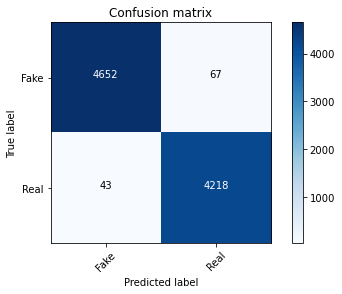

In [35]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

#  Naive Bayes

In [36]:
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

model = pipe.fit(X_train, y_train)

prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 95.24%


In [37]:
from sklearn.metrics import classification_report
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       0.97      0.94      0.95      4719
        true       0.94      0.97      0.95      4261

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



# Support Vector Machine (SVM) 

In [38]:
from sklearn.linear_model import SGDClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())])

model = pipe.fit(X_train, y_train)

prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.21%


In [39]:
from sklearn.metrics import classification_report
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       1.00      0.99      0.99      4719
        true       0.99      1.00      0.99      4261

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



#  Decision Tree Classifier 

In [40]:
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])

model = pipe.fit(X_train, y_train)

prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.69%


Confusion matrix, without normalization


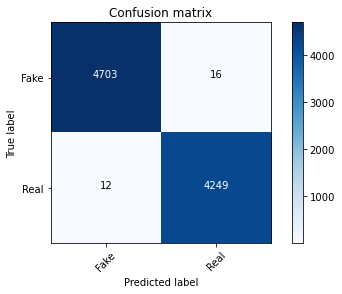

In [41]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])